In [1]:
import requests
from bs4 import BeautifulSoup
import json
import nltk
from gensim import summarization
import pandas as pd
import nltk 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import warnings
warnings.simplefilter("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find_all('p')]
    #print(url)
    return text

# URLs of transcripts in scope
urls = ['https://youthimagination.org/index.php/item/225-permanent-by-gina-burgess',
      'https://youthimagination.org/index.php/item/224-the-exiled-mage-by-katie-keridan',
        'https://youthimagination.org/index.php/publish/magazine-issues/2020/issue-82-mar-2020/item/226-the-crate-by-david-rich',
        'https://youthimagination.org/index.php/publish/magazine-issues/2020/issue-82-mar-2020/item/223-the-church-of-rainbow-by-philip-charter',
        'https://youthimagination.org/index.php/publish/magazine-issues/2020/issue-81-feb-2020/item/222-screams-and-shots-by-trisha-mckee',
       ' https://youthimagination.org/index.php/publish/magazine-issues/2020/issue-81-feb-2020/item/221-reflected-light-by-norah-rami',
        'https://youthimagination.org/index.php/publish/magazine-issues/2020/issue-80-jan-2020/item/220-yet-a-youth-by-eleanor-glewwe',
        'https://youthimagination.org/index.php/publish/magazine-issues/2020/issue-80-jan-2020/item/219-horse-master-by-maureen-bowden',
       'https://youthimagination.org/index.php/publish/magazine-issues/2019/issue-78-nov-2020/item/218-the-student-from-xenor-by-john-mara',
     'https://youthimagination.org/index.php/publish/magazine-issues/2019/issue-78-nov-2020/item/217-bloody-beach-by-brooke-tiedt']
###
##urls=['https://www.narendramodi.in/text-of-prime-minister-narendra-modi-s-address-to-the-nation-on-combating-covid-19-548861',
     #'https://www.narendramodi.in/text-of-prime-minister-narendra-modi-s-address-to-the-nation-on-vital-aspects-relating-to-the-menace-of-covid-19-548941',
    # 'https://www.narendramodi.in/text-of-prime-minister-narendra-modi-s-address-to-the-nation--549108',
    # 'https://www.narendramodi.in/text-of-pm-s-address-to-the-nation-549264',
    #'https://www.narendramodi.in/prime-minister-narendra-modi-s-text-of-speech-on-vesak-global-celebration-on-buddha-purnima-549561']
###
# Comedian names
Writers=['Gina Burges' , 'Katie Kerdian', 'David Rich','Philip charter','Trisha Mckee','Norah Rami','Eleanor Glewwe ','Maureen Bowden','John Mara','Brooke Tiedt']

In [3]:
!mkdir transcripts

transcripts = [url_to_transcript(u) for u in urls]
for i, c in enumerate(Writers):
     with open("transcripts/" + c + ".txt", "wb") as file:
         pickle.dump(transcripts[i], file)

A subdirectory or file transcripts already exists.


In [4]:
data = {}
for i, c in enumerate(Writers):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [5]:
data.keys()


dict_keys(['Gina Burges', 'Katie Kerdian', 'David Rich', 'Philip charter', 'Trisha Mckee', 'Norah Rami', 'Eleanor Glewwe ', 'Maureen Bowden', 'John Mara', 'Brooke Tiedt'])

In [6]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [7]:
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}


In [8]:
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
Brooke Tiedt,"There’s a different world inside the ocean. She can hear bits and pieces of it, walking along the shore. The rocky sand bites at her bare feet. Sh..."
David Rich,"I cruised out of BLE’s house in my crate. A teenaged girl like me, she was one of few people I’d ever seen in person. I stopped my crate in no pla..."
Eleanor Glewwe,"“And he said unto Jether his firstborn, Up, and slay them. But the youth drew not his sword: for he feared, because he was yet a youth.” Judges 8:..."
Gina Burges,"“You sure you want to do this?” Kai asked. “If you don’t, just say. No pressure.” We sat facing each other on the bed in his room, with heavy, bla..."
John Mara,"“Aaaaand …. begin!” the SAT proctor says, and settles in for a two-hour nap. Five minutes later, Gyro stirs the proctor awake and hands her his t..."
Katie Kerdian,"“Katha, what have you done?” A hand gripped my shoulder and shook me, pulling me from sleep. I scrunched my eyes closed and attempted to roll over..."
Maureen Bowden,"Jane, heiress of Moorcroft Grange, climbed the ancient beech tree in the overgrown hedge in an attempt to rescue Harriet, the stable-boy’s cat. Sh..."
Norah Rami,"A blanket smothered the sky, a faint light filtering through the nightlamps. Chivena’s feet followed the same path she had taken for years, skippi..."
Philip charter,"Beyond the cracked sidewalk, and the telephone pole with layers of flyers in a rainbow of colors, and the patch of dry brown grass there stood a t..."
Trisha Mckee,"They say in horror films that the ditzy, beautiful girl always dies first. In Kimberly’s case, that did not happen. She survived. Survived in the ..."


In [9]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [10]:
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
Brooke Tiedt,theres a different world inside the ocean she can hear bits and pieces of it walking along the shore the rocky sand bites at her bare feet she can...
David Rich,i cruised out of bles house in my crate a teenaged girl like me she was one of few people id ever seen in person i stopped my crate in no place in...
Eleanor Glewwe,and he said unto jether his firstborn up and slay them but the youth drew not his sword for he feared because he was yet a youth judges absalom...
Gina Burges,you sure you want to do this kai asked if you dont just say no pressure we sat facing each other on the bed in his room with heavy black curtains ...
John Mara,aaaaand begin the sat proctor says and settles in for a twohour nap five minutes later gyro stirs the proctor awake and hands her his test youre...
Katie Kerdian,katha what have you done a hand gripped my shoulder and shook me pulling me from sleep i scrunched my eyes closed and attempted to roll over but t...
Maureen Bowden,jane heiress of moorcroft grange climbed the ancient beech tree in the overgrown hedge in an attempt to rescue harriet the stableboys cat she craw...
Norah Rami,a blanket smothered the sky a faint light filtering through the nightlamps chivenas feet followed the same path she had taken for years skipping i...
Philip charter,beyond the cracked sidewalk and the telephone pole with layers of flyers in a rainbow of colors and the patch of dry brown grass there stood a ten...
Trisha Mckee,they say in horror films that the ditzy beautiful girl always dies first in kimberlys case that did not happen she survived survived in the sense ...


In [11]:
data_df.to_pickle("corpus.pkl")


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,aaaaand,ab,aback,abandon,abandoned,abel,ability,abilityor,able,abominable,...,younger,youngun,youre,youth,youve,yowled,zach,zeus,zombies,zone
Brooke Tiedt,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,2,0,0,0,0,0
David Rich,0,0,0,0,1,0,2,0,3,2,...,0,0,4,0,1,0,0,0,0,2
Eleanor Glewwe,0,12,1,0,0,8,0,0,0,0,...,1,0,16,2,2,0,0,0,0,0
Gina Burges,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
John Mara,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Katie Kerdian,0,0,0,0,0,0,0,1,1,0,...,1,0,2,1,2,0,0,0,0,0
Maureen Bowden,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
Norah Rami,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
Philip charter,0,0,0,0,1,0,0,0,1,0,...,0,1,0,1,1,0,0,0,0,0
Trisha Mckee,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,1,1,0,0


In [13]:
data_dtm.to_pickle("dtm.pkl")
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

# Exploratory Data analysis


In [14]:
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,Brooke Tiedt,David Rich,Eleanor Glewwe,Gina Burges,John Mara,Katie Kerdian,Maureen Bowden,Norah Rami,Philip charter,Trisha Mckee
aaaaand,0,0,0,0,1,0,0,0,0,0
ab,0,0,12,0,0,0,0,0,0,0
aback,0,0,1,0,0,0,0,0,0,0
abandon,0,0,0,0,0,0,1,0,0,0
abandoned,0,1,0,0,0,0,0,0,1,0


In [15]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Brooke Tiedt': [('shes', 23),
  ('home', 10),
  ('water', 9),
  ('like', 8),
  ('woman', 8),
  ('says', 7),
  ('waters', 7),
  ('girl', 7),
  ('doesnt', 6),
  ('room', 6),
  ('sand', 6),
  ('just', 6),
  ('theres', 6),
  ('beach', 6),
  ('youll', 5),
  ('glow', 5),
  ('monster', 5),
  ('light', 5),
  ('world', 4),
  ('feet', 4),
  ('place', 4),
  ('need', 4),
  ('dark', 4),
  ('eyes', 4),
  ('tells', 4),
  ('cold', 4),
  ('different', 4),
  ('ocean', 4),
  ('girls', 4),
  ('special', 4)],
 'David Rich': [('id', 42),
  ('category', 28),
  ('crates', 22),
  ('apu', 21),
  ('hayden', 20),
  ('need', 18),
  ('people', 18),
  ('oar', 16),
  ('ble', 15),
  ('didnt', 14),
  ('crate', 13),
  ('langer', 13),
  ('youll', 13),
  ('american', 13),
  ('time', 11),
  ('live', 11),
  ('border', 11),
  ('janet', 11),
  ('friends', 11),
  ('know', 10),
  ('said', 10),
  ('like', 9),
  ('seen', 9),
  ('old', 9),
  ('way', 8),
  ('political', 8),
  ('day', 8),
  ('wanted', 8),
  ('im', 7),
  ('needed',

In [16]:
for writer, top_words in top_dict.items():
    print(writer)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Brooke Tiedt
shes, home, water, like, woman, says, waters, girl, doesnt, room, sand, just, theres, beach
---
David Rich
id, category, crates, apu, hayden, need, people, oar, ble, didnt, crate, langer, youll, american
---
Eleanor Glewwe 
absalom, said, didnt, susannah, seaver, gideon, just, like, men, dont, man, know, did, youre
---
Gina Burges
kai, gun, youll, room, tattoo, need, like, sure, thread, mural, just, eyes, said, day
---
John Mara
gyro, headmaster, cindy, says, spike, xenor, year, gyros, march, black, hes, proctor, hole, gyronomus
---
Katie Kerdian
id, magic, mother, father, turner, eyes, like, just, use, wasnt, day, youll, said, didnt
---
Maureen Bowden
said, horsemaster, gift, world, jane, healer, father, im, come, red, lady, little, reached, grange
---
Norah Rami
lee, usual, chivena, words, class, notes, boy, just, way, light, student, time, silence, right
---
Philip charter
kid, rainbow, church, said, like, old, janice, didnt, wall, garage, junkyard, rejoice, hed, daddy


In [17]:
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for writer in data.columns:
    top = [word for (word, count) in top_dict[writer]]
    for t in top:
        words.append(t)
        
words

['shes',
 'home',
 'water',
 'like',
 'woman',
 'says',
 'waters',
 'girl',
 'doesnt',
 'room',
 'sand',
 'just',
 'theres',
 'beach',
 'youll',
 'glow',
 'monster',
 'light',
 'world',
 'feet',
 'place',
 'need',
 'dark',
 'eyes',
 'tells',
 'cold',
 'different',
 'ocean',
 'girls',
 'special',
 'id',
 'category',
 'crates',
 'apu',
 'hayden',
 'need',
 'people',
 'oar',
 'ble',
 'didnt',
 'crate',
 'langer',
 'youll',
 'american',
 'time',
 'live',
 'border',
 'janet',
 'friends',
 'know',
 'said',
 'like',
 'seen',
 'old',
 'way',
 'political',
 'day',
 'wanted',
 'im',
 'needed',
 'absalom',
 'said',
 'didnt',
 'susannah',
 'seaver',
 'gideon',
 'just',
 'like',
 'men',
 'dont',
 'man',
 'know',
 'did',
 'youre',
 'mama',
 'eyes',
 'think',
 'brothers',
 'young',
 'way',
 'innkeeper',
 'micah',
 'say',
 'time',
 'seavers',
 'inn',
 'cousin',
 'felt',
 'came',
 'ab',
 'kai',
 'gun',
 'youll',
 'room',
 'tattoo',
 'need',
 'like',
 'sure',
 'thread',
 'mural',
 'just',
 'eyes',
 'sai

In [18]:
Counter(words).most_common()
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like', 'youll', 'need', 'said', 'day']

In [19]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [20]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

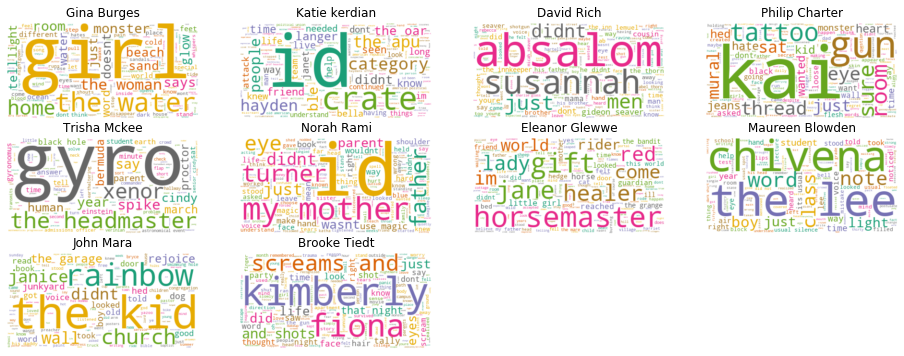

In [21]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Gina Burges', 'Katie kerdian', 'David Rich', 'Philip Charter', 'Trisha Mckee', 'Norah Rami', 'Eleanor Glewwe', 'Maureen Blowden', 'John Mara', 'Brooke Tiedt' ]
# Create subplots for each comedian
for index, writer in enumerate(data.columns):
    wc.generate(data_clean.transcript[writer])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [22]:

unique_list = []
for writer in data.columns:
    uniques = data[writer].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['writer', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,writer,unique_words
0,Gina Burges,4564
1,Katie kerdian,4564
2,David Rich,4564
3,Philip Charter,4564
4,Trisha Mckee,4564
5,Norah Rami,4564
6,Eleanor Glewwe,4564
7,Maureen Blowden,4564
8,John Mara,4564
9,Brooke Tiedt,4564


In [23]:
total_list = []
for writer in data.columns:
    totals = sum(data[writer])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [150,150,150,150,150,150,150,150,150,150]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,writer,unique_words,total_words,run_times,words_per_minute
3,Philip Charter,4564,415,150,2.766667
0,Gina Burges,4564,732,150,4.880000
5,Norah Rami,4564,755,150,5.033333
7,Maureen Blowden,4564,903,150,6.020000
4,Trisha Mckee,4564,947,150,6.313333
9,Brooke Tiedt,4564,1270,150,8.466667
6,Eleanor Glewwe,4564,1619,150,10.793333
8,John Mara,4564,1765,150,11.766667
1,Katie kerdian,4564,2435,150,16.233333
2,David Rich,4564,2896,150,19.306667


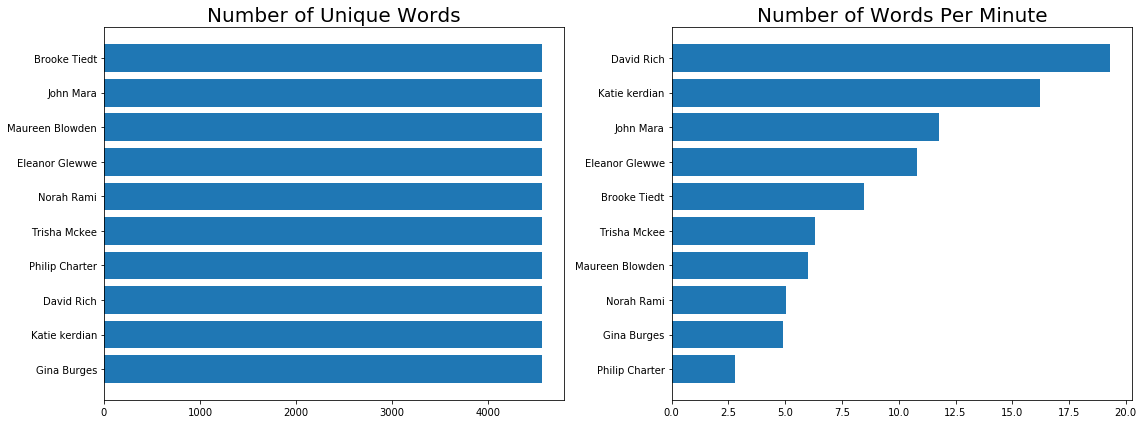

In [24]:
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.writer)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.writer)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

# sentimental analysis


In [25]:
from textblob import TextBlob
data = pd.read_pickle('corpus.pkl')
data
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data


,transcript,polarity,subjectivity
Brooke Tiedt,"There’s a different world inside the ocean. She can hear bits and pieces of it, walking along the shore. The rocky sand bites at her bare feet. Sh...",0.060516,0.500119
David Rich,"I cruised out of BLE’s house in my crate. A teenaged girl like me, she was one of few people I’d ever seen in person. I stopped my crate in no pla...",0.115278,0.502337
Eleanor Glewwe,"“And he said unto Jether his firstborn, Up, and slay them. But the youth drew not his sword: for he feared, because he was yet a youth.” Judges 8:...",-0.005710,0.483532
Gina Burges,"“You sure you want to do this?” Kai asked. “If you don’t, just say. No pressure.” We sat facing each other on the bed in his room, with heavy, bla...",0.039642,0.523412
John Mara,"“Aaaaand …. begin!” the SAT proctor says, and settles in for a two-hour nap. Five minutes later, Gyro stirs the proctor awake and hands her his t...",0.034312,0.445586
Katie Kerdian,"“Katha, what have you done?” A hand gripped my shoulder and shook me, pulling me from sleep. I scrunched my eyes closed and attempted to roll over...",0.036455,0.506488
Maureen Bowden,"Jane, heiress of Moorcroft Grange, climbed the ancient beech tree in the overgrown hedge in an attempt to rescue Harriet, the stable-boy’s cat. Sh...",0.055475,0.378882
Norah Rami,"A blanket smothered the sky, a faint light filtering through the nightlamps. Chivena’s feet followed the same path she had taken for years, skippi...",0.092678,0.450365
Philip charter,"Beyond the cracked sidewalk, and the telephone pole with layers of flyers in a rainbow of colors, and the patch of dry brown grass there stood a t...",0.110160,0.438957
Trisha Mckee,"They say in horror films that the ditzy, beautiful girl always dies first. In Kimberly’s case, that did not happen. She survived. Survived in the ...",0.041330,0.469845


In [26]:
full_names = ['Gina Burges', 'Katie kerdian', 'David Rich', 'Philip Charter', 'Trisha Mckee', 'Norah Rami', 'Eleanor Glewwe', 'Maureen Blowden', 'John Mara', 'Brooke Tiedt' ]
#full_names=['Janta_curfew(22 March)' , 'LockDown(24 March)', 'Lights@9PM(5 april)','LockDow_extended(April 14)','Budha Purnami(May 07)']

data['full_name'] = full_names
data

,transcript,polarity,subjectivity,full_name
Brooke Tiedt,"There’s a different world inside the ocean. She can hear bits and pieces of it, walking along the shore. The rocky sand bites at her bare feet. Sh...",0.060516,0.500119,Gina Burges
David Rich,"I cruised out of BLE’s house in my crate. A teenaged girl like me, she was one of few people I’d ever seen in person. I stopped my crate in no pla...",0.115278,0.502337,Katie kerdian
Eleanor Glewwe,"“And he said unto Jether his firstborn, Up, and slay them. But the youth drew not his sword: for he feared, because he was yet a youth.” Judges 8:...",-0.005710,0.483532,David Rich
Gina Burges,"“You sure you want to do this?” Kai asked. “If you don’t, just say. No pressure.” We sat facing each other on the bed in his room, with heavy, bla...",0.039642,0.523412,Philip Charter
John Mara,"“Aaaaand …. begin!” the SAT proctor says, and settles in for a two-hour nap. Five minutes later, Gyro stirs the proctor awake and hands her his t...",0.034312,0.445586,Trisha Mckee
Katie Kerdian,"“Katha, what have you done?” A hand gripped my shoulder and shook me, pulling me from sleep. I scrunched my eyes closed and attempted to roll over...",0.036455,0.506488,Norah Rami
Maureen Bowden,"Jane, heiress of Moorcroft Grange, climbed the ancient beech tree in the overgrown hedge in an attempt to rescue Harriet, the stable-boy’s cat. Sh...",0.055475,0.378882,Eleanor Glewwe
Norah Rami,"A blanket smothered the sky, a faint light filtering through the nightlamps. Chivena’s feet followed the same path she had taken for years, skippi...",0.092678,0.450365,Maureen Blowden
Philip charter,"Beyond the cracked sidewalk, and the telephone pole with layers of flyers in a rainbow of colors, and the patch of dry brown grass there stood a t...",0.110160,0.438957,John Mara
Trisha Mckee,"They say in horror films that the ditzy, beautiful girl always dies first. In Kimberly’s case, that did not happen. She survived. Survived in the ...",0.041330,0.469845,Brooke Tiedt


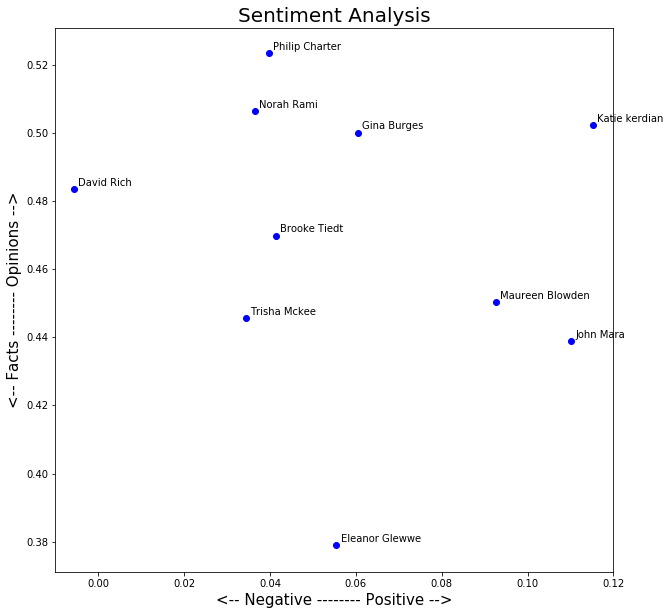

In [27]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

for index, writer in enumerate(data.index):
    x = data.polarity.loc[ writer]
    y = data.subjectivity.loc[writer]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()
data_df.to_pickle("corpus.pkl")


In [28]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,aaaaand,ab,aback,abandon,abandoned,abel,ability,abilityor,able,abominable,...,younger,youngun,youre,youth,youve,yowled,zach,zeus,zombies,zone
Brooke Tiedt,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,2,0,0,0,0,0
David Rich,0,0,0,0,1,0,2,0,3,2,...,0,0,4,0,1,0,0,0,0,2
Eleanor Glewwe,0,12,1,0,0,8,0,0,0,0,...,1,0,16,2,2,0,0,0,0,0
Gina Burges,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
John Mara,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Katie Kerdian,0,0,0,0,0,0,0,1,1,0,...,1,0,2,1,2,0,0,0,0,0
Maureen Bowden,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
Norah Rami,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
Philip charter,0,0,0,0,1,0,0,0,1,0,...,0,1,0,1,1,0,0,0,0,0
Trisha Mckee,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,1,1,0,0


In [29]:
data_dtm.to_pickle("dtm.pkl")
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))


# Topic Modeling

In [30]:
data = pd.read_pickle('dtm_stop.pkl')
data

,aaaaand,ab,aback,abandon,abandoned,abel,ability,abilityor,able,abominable,...,younger,youngun,youre,youth,youve,yowled,zach,zeus,zombies,zone
Brooke Tiedt,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,2,0,0,0,0,0
David Rich,0,0,0,0,1,0,2,0,3,2,...,0,0,4,0,1,0,0,0,0,2
Eleanor Glewwe,0,12,1,0,0,8,0,0,0,0,...,1,0,16,2,2,0,0,0,0,0
Gina Burges,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
John Mara,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Katie Kerdian,0,0,0,0,0,0,0,1,1,0,...,1,0,2,1,2,0,0,0,0,0
Maureen Bowden,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
Norah Rami,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
Philip charter,0,0,0,0,1,0,0,0,1,0,...,0,1,0,1,1,0,0,0,0,0
Trisha Mckee,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,1,1,0,0


In [31]:
from gensim import matutils, models
import scipy.sparse
tdm = data.transpose()
tdm.head()

,Brooke Tiedt,David Rich,Eleanor Glewwe,Gina Burges,John Mara,Katie Kerdian,Maureen Bowden,Norah Rami,Philip charter,Trisha Mckee
aaaaand,0,0,0,0,1,0,0,0,0,0
ab,0,0,12,0,0,0,0,0,0,0
aback,0,0,1,0,0,0,0,0,0,0
abandon,0,0,0,0,0,0,1,0,0,0
abandoned,0,1,0,0,0,0,0,0,1,0


In [32]:
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [33]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.008*"absalom" + 0.007*"didnt" + 0.005*"kid" + 0.004*"just" + 0.004*"susannah" + 0.004*"know" + 0.004*"dont" + 0.004*"seaver" + 0.003*"father" + 0.003*"looked"'),
 (1,
  '0.005*"id" + 0.004*"just" + 0.004*"time" + 0.004*"kimberly" + 0.003*"gyro" + 0.003*"category" + 0.003*"words" + 0.003*"lee" + 0.003*"shes" + 0.003*"people"')]

In [34]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=10, passes=10)
lda.print_topics()

[(0,
  '0.016*"absalom" + 0.009*"didnt" + 0.009*"susannah" + 0.009*"just" + 0.008*"seaver" + 0.007*"gideon" + 0.006*"lee" + 0.006*"way" + 0.006*"dont" + 0.005*"men"'),
 (1,
  '0.000*"absalom" + 0.000*"didnt" + 0.000*"susannah" + 0.000*"just" + 0.000*"seaver" + 0.000*"time" + 0.000*"dont" + 0.000*"kimberly" + 0.000*"say" + 0.000*"did"'),
 (2,
  '0.018*"kimberly" + 0.011*"fiona" + 0.009*"shots" + 0.009*"screams" + 0.009*"wes" + 0.008*"night" + 0.006*"did" + 0.006*"just" + 0.006*"life" + 0.006*"eyes"'),
 (3,
  '0.023*"kid" + 0.009*"rainbow" + 0.008*"church" + 0.006*"old" + 0.005*"wall" + 0.005*"didnt" + 0.005*"janice" + 0.005*"garage" + 0.005*"junkyard" + 0.005*"rejoice"'),
 (4,
  '0.000*"didnt" + 0.000*"kid" + 0.000*"time" + 0.000*"id" + 0.000*"just" + 0.000*"did" + 0.000*"dont" + 0.000*"way" + 0.000*"know" + 0.000*"absalom"'),
 (5,
  '0.015*"shes" + 0.008*"kai" + 0.007*"home" + 0.006*"room" + 0.006*"water" + 0.006*"just" + 0.005*"says" + 0.005*"woman" + 0.005*"gun" + 0.005*"girl"'),
 (6

In [35]:
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,transcript
Brooke Tiedt,theres a different world inside the ocean she can hear bits and pieces of it walking along the shore the rocky sand bites at her bare feet she can...
David Rich,i cruised out of bles house in my crate a teenaged girl like me she was one of few people id ever seen in person i stopped my crate in no place in...
Eleanor Glewwe,and he said unto jether his firstborn up and slay them but the youth drew not his sword for he feared because he was yet a youth judges absalom...
Gina Burges,you sure you want to do this kai asked if you dont just say no pressure we sat facing each other on the bed in his room with heavy black curtains ...
John Mara,aaaaand begin the sat proctor says and settles in for a twohour nap five minutes later gyro stirs the proctor awake and hands her his test youre...
Katie Kerdian,katha what have you done a hand gripped my shoulder and shook me pulling me from sleep i scrunched my eyes closed and attempted to roll over but t...
Maureen Bowden,jane heiress of moorcroft grange climbed the ancient beech tree in the overgrown hedge in an attempt to rescue harriet the stableboys cat she craw...
Norah Rami,a blanket smothered the sky a faint light filtering through the nightlamps chivenas feet followed the same path she had taken for years skipping i...
Philip charter,beyond the cracked sidewalk and the telephone pole with layers of flyers in a rainbow of colors and the patch of dry brown grass there stood a ten...
Trisha Mckee,they say in horror films that the ditzy beautiful girl always dies first in kimberlys case that did not happen she survived survived in the sense ...


In [36]:
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns


,transcript
Brooke Tiedt,theres world ocean bits pieces shore sand bites bare feet salt wind sandals hand water wash feet shock cold nerves fingertips girls beach heard gi...
David Rich,i bles house crate girl people person i crate place law i crates id mine command crates everyones presence contacts people history recounts people...
Eleanor Glewwe,jether youth sword youth judges sister susannah brother lemuel side ones pine pew weary service church voices seavers glasses gustafssons hymn bea...
Gina Burges,pressure bed room curtains zombies ghosts aliens wall mural eyes kai eye i gaze focus bony frame waist thread jeans i everything kai soulmate i be...
John Mara,aaaaand sat proctor twohour nap minutes proctor awake test youre technology – filling circles – seat proctor mutters returns desk front spike capt...
Katie Kerdian,hand shoulder sleep i eyes grip shoulder i mother standing bed hand shoulder book book book id closet one awake i position hair ears things i voic...
Maureen Bowden,jane heiress grange beech tree hedge attempt cat branch harriet cat tree stables jane branch hedge feet estate gardens meadow flowers cowslip yarr...
Norah Rami,blanket sky faint light nightlamps feet path years grade sprinting grade grade light chivena way memorization suit bus time stop spot front girl s...
Philip charter,sidewalk telephone pole layers flyers rainbow colors patch grass concrete block wall dozens coats paint shrine foot burntout candles flowers word ...
Trisha Mckee,horror films ditzy girl kimberlys case sense night night month night mood speech reason parents response trauma fear panic mound jello psychiatris...


In [37]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,aaaaand,ab,abel,ability,abilityor,abomination,abort,absalom,absaloms,absence,...,yoke,york,youcouldnt,youd,youll,youngun,youth,youve,zombies,zone
Brooke Tiedt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,1,0,0
David Rich,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,6,0,0,0,0,2
Eleanor Glewwe,0,4,2,0,0,0,0,41,3,0,...,1,0,1,0,3,0,2,1,0,0
Gina Burges,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,1,0
John Mara,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,2,0,0,0,0,0
Katie Kerdian,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,2,0,1,2,0,0
Maureen Bowden,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
Norah Rami,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,1,0,0,0
Philip charter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,1,1,1,0,0
Trisha Mckee,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,2,0,0,0,0,0


In [38]:
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())


In [39]:
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.010*"absalom" + 0.009*"eyes" + 0.007*"way" + 0.007*"day" + 0.006*"words" + 0.006*"night" + 0.005*"susannah" + 0.005*"men" + 0.005*"seaver" + 0.005*"lee"'),
 (1,
  '0.012*"kid" + 0.006*"category" + 0.005*"day" + 0.005*"world" + 0.005*"id" + 0.005*"apu" + 0.005*"room" + 0.005*"shes" + 0.005*"crates" + 0.004*"church"')]

In [40]:
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [41]:
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,aaaaand,ab,abel,ability,abilityor,able,abominable,abomination,abort,abpositive,...,yoke,york,youcouldnt,youd,younger,youngun,youth,youve,zombies,zone
Brooke Tiedt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
David Rich,0,0,0,2,0,3,2,0,0,2,...,0,0,0,0,0,0,0,0,0,2
Eleanor Glewwe,0,8,8,0,0,0,0,0,0,0,...,1,0,1,1,1,0,2,2,0,0
Gina Burges,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
John Mara,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
Katie Kerdian,0,0,0,0,1,1,0,1,0,0,...,0,0,0,1,1,0,1,2,0,0
Maureen Bowden,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Norah Rami,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Philip charter,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
Trisha Mckee,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [42]:
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [43]:
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.010*"id" + 0.008*"category" + 0.007*"apu" + 0.007*"crates" + 0.006*"life" + 0.006*"hayden" + 0.005*"screams" + 0.005*"oar" + 0.005*"night" + 0.005*"ble"'),
 (1,
  '0.011*"lee" + 0.010*"world" + 0.009*"usual" + 0.008*"shes" + 0.008*"girl" + 0.008*"gift" + 0.008*"horsemaster" + 0.007*"room" + 0.007*"jane" + 0.006*"class"'),
 (2,
  '0.017*"gyro" + 0.011*"headmaster" + 0.007*"cindy" + 0.007*"xenor" + 0.005*"year" + 0.005*"black" + 0.005*"spike" + 0.004*"parents" + 0.004*"hole" + 0.004*"proctor"'),
 (3,
  '0.014*"absalom" + 0.014*"kid" + 0.008*"susannah" + 0.006*"church" + 0.006*"men" + 0.006*"gideon" + 0.006*"seaver" + 0.006*"man" + 0.005*"didnt" + 0.005*"father"')]

In [44]:
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.015*"id" + 0.009*"category" + 0.008*"apu" + 0.007*"crates" + 0.007*"hayden" + 0.006*"oar" + 0.005*"mother" + 0.005*"ble" + 0.005*"american" + 0.005*"friends"'),
 (1,
  '0.012*"absalom" + 0.007*"night" + 0.007*"susannah" + 0.005*"men" + 0.005*"seaver" + 0.005*"gideon" + 0.005*"father" + 0.005*"world" + 0.005*"man" + 0.004*"horsemaster"'),
 (2,
  '0.015*"kid" + 0.007*"lee" + 0.007*"gyro" + 0.006*"usual" + 0.005*"light" + 0.005*"church" + 0.005*"shes" + 0.005*"boy" + 0.005*"rainbow" + 0.004*"notes"')]

0 - men, gideon, brothers (MALE),
1- gift, horsemaster , wolrd, rainbow(creative),
2- notes, light (material),
3 - screams, night, gun , shots, life(horror)

In [45]:
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(2, 'Brooke Tiedt'),
 (0, 'David Rich'),
 (1, 'Eleanor Glewwe '),
 (1, 'Gina Burges'),
 (2, 'John Mara'),
 (0, 'Katie Kerdian'),
 (1, 'Maureen Bowden'),
 (2, 'Norah Rami'),
 (2, 'Philip charter'),
 (1, 'Trisha Mckee')]

In [46]:
data = pd.read_pickle('corpus.pkl')
data

,transcript
Brooke Tiedt,"There’s a different world inside the ocean. She can hear bits and pieces of it, walking along the shore. The rocky sand bites at her bare feet. Sh..."
David Rich,"I cruised out of BLE’s house in my crate. A teenaged girl like me, she was one of few people I’d ever seen in person. I stopped my crate in no pla..."
Eleanor Glewwe,"“And he said unto Jether his firstborn, Up, and slay them. But the youth drew not his sword: for he feared, because he was yet a youth.” Judges 8:..."
Gina Burges,"“You sure you want to do this?” Kai asked. “If you don’t, just say. No pressure.” We sat facing each other on the bed in his room, with heavy, bla..."
John Mara,"“Aaaaand …. begin!” the SAT proctor says, and settles in for a two-hour nap. Five minutes later, Gyro stirs the proctor awake and hands her his t..."
Katie Kerdian,"“Katha, what have you done?” A hand gripped my shoulder and shook me, pulling me from sleep. I scrunched my eyes closed and attempted to roll over..."
Maureen Bowden,"Jane, heiress of Moorcroft Grange, climbed the ancient beech tree in the overgrown hedge in an attempt to rescue Harriet, the stable-boy’s cat. Sh..."
Norah Rami,"A blanket smothered the sky, a faint light filtering through the nightlamps. Chivena’s feet followed the same path she had taken for years, skippi..."
Philip charter,"Beyond the cracked sidewalk, and the telephone pole with layers of flyers in a rainbow of colors, and the patch of dry brown grass there stood a t..."
Trisha Mckee,"They say in horror films that the ditzy, beautiful girl always dies first. In Kimberly’s case, that did not happen. She survived. Survived in the ..."


In [47]:
ali_text = data.transcript.loc['Philip charter']
ali_text[:200]

'Beyond the cracked sidewalk, and the telephone pole with layers of flyers in a rainbow of colors, and the patch of dry brown grass there stood a ten-foot-high concrete block wall, caked with dozens of'

In [48]:
from collections import defaultdict

def markov_chain(text):
    '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''
    
    # Tokenize the text by word, though including punctuation
    words = text.split(' ')
    
    # Initialize a default dictionary to hold all of the words and next words
    m_dict = defaultdict(list)
    
    # Create a zipped list of all of the word pairs and put them in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [49]:
ali_dict = markov_chain(ali_text)
ali_dict

{'Beyond': ['the', 'the'],
 'the': ['cracked',
  'telephone',
  'patch',
  'foot',
  'wall,',
  'kid,',
  'gigantic',
  'back',
  'boy,',
  'posters',
  'word',
  'girls,',
  'outline',
  'word',
  'wall',
  'opposite',
  'field,',
  'shouts',
  'swimming',
  'trees.',
  'reddish',
  'shade',
  'wall',
  'junkyard.',
  'kid',
  'two',
  'creator,”',
  'boy.',
  'kingdom',
  'sky,',
  'dry',
  'ground.',
  'game',
  'sun',
  'older',
  'junkyard',
  'old',
  'good',
  'woods,',
  'house.',
  'collar',
  'dog',
  'other',
  'junkyard',
  'kid',
  'duds',
  'Bryce',
  'house.',
  'stream,',
  'hole',
  'chain-link',
  'kid,',
  'city',
  'kid',
  'Bryce',
  'swamp',
  'least',
  'woods.',
  'only',
  'pastor’s',
  'two',
  'junkyard',
  'garage,',
  'hot',
  'house,',
  'garage',
  'garage',
  'house.',
  'fur',
  'word',
  'Gospel,',
  'dog',
  'Bible',
  'bright',
  'hunters',
  'kid',
  'displays',
  'hood',
  'evening',
  'crickets,',
  'songs',
  'kid',
  'mattress.',
  'stack',
  's

In [50]:
import random

def generate_sentence(chain, count=15):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [51]:
generate_sentence(ali_dict)


'Blended with dozens of a stinking dead coyote carcass had already geared up to apart.'